In [1]:
import IPython.display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta, time

import numpy as np
import tensorflow as tf
from tensorflow.contrib.framework import arg_scope
from tensorflow import layers
#from tensorflow.contrib import layers
import h5py
from tqdm import tqdm_notebook as tqdm
import os
from glob import glob
import copy 
from tensorflow.python.client import device_lib
import pandas as pd
import hdbscan
import sys
import pickle
import time
import calmap
from datetime import time as datetime_time

sys.path.append("../utils/")
from importlib import reload
from sparray import sparray
import ConvAE
reload(ConvAE); from ConvAE import *
import ConvAE_vis_funcs
reload(ConvAE_vis_funcs); from ConvAE_vis_funcs import *

/home/brad/.conda/envs/tensorflow_nogpu/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
dims = [64, 64, 1] # first dimension of input data
batch_size = 32 # size of batches to use (per GPU)
species = 'ST'
data_dir = '/home/brad/induced_metric/data/'

# dimensions of network
# [depth, filter size, stride] # decoder will become inverse of encoder
network_dims = [
    [64, 5, 1],  # 32
    [128, 5, 2], # 16
    [256, 5, 2], # 8
    [256, 5, 2], # 4
    [4000, 0, 0],
    [4000, 0, 0]
]
hidden_size = 2

'/home/brad/induced_metric/data/'

In [9]:
# Specify which bird this notebook is focusing on
bird = 'b1110'
species = 'ST'

model = ConvAE(dims, batch_size, network_dims, hidden_size, gpus=[0], adam_eps = 1.0) # eps = 0.1 and lr = 1 (after lr 0.1)
print(data_dir)
#model.load_network(data_dir+'Models/'+species+'/'+bird+'/'+bird)
model.load_network('/home/brad/induced_metric/data/Models/ST/b1110/b1110')



Encoder shapes:  [(32, 64, 64, 1), (32, 64, 64, 64), (32, 32, 32, 128), (32, 16, 16, 256), (32, 16384), (32, 4000), (32, 4000)]
Decoder shapes:  [(32, 2), (32, 4000), (32, 4000), (32, 8, 8, 256), (32, 16, 16, 256), (32, 16, 16, 256), (32, 32, 32, 256), (32, 32, 32, 128), (32, 64, 64, 128), (32, 64, 64, 64), (32, 64, 64, 64), (32, 64, 64, 1), (32, 4096)]
Network Initialized
/home/brad/induced_metric/data/
INFO:tensorflow:Restoring parameters from /mnt/cube/tsainbur/Projects/github_repos/StarlingAE_sample_gen/data/Models/ST/b1110/b1110
Network Loaded


['global_step/Initializer/Const',
 'global_step',
 'global_step/Assign',
 'global_step/read',
 'Placeholder',
 'Placeholder_1',
 'Placeholder_2',
 'Placeholder_3',
 'Tower_0/strided_slice/stack',
 'Tower_0/strided_slice/stack_1',
 'Tower_0/strided_slice/stack_2',
 'Tower_0/strided_slice',
 'Tower_0/enc/Reshape/shape',
 'Tower_0/enc/Reshape',
 'enc/enc_0/kernel/Initializer/random_uniform/shape',
 'enc/enc_0/kernel/Initializer/random_uniform/min',
 'enc/enc_0/kernel/Initializer/random_uniform/max',
 'enc/enc_0/kernel/Initializer/random_uniform/RandomUniform',
 'enc/enc_0/kernel/Initializer/random_uniform/sub',
 'enc/enc_0/kernel/Initializer/random_uniform/mul',
 'enc/enc_0/kernel/Initializer/random_uniform',
 'enc/enc_0/kernel',
 'enc/enc_0/kernel/Assign',
 'enc/enc_0/kernel/read',
 'enc/enc_0/bias/Initializer/zeros',
 'enc/enc_0/bias',
 'enc/enc_0/bias/Assign',
 'enc/enc_0/bias/read',
 'Tower_0/enc/enc_0/dilation_rate',
 'Tower_0/enc/enc_0/Conv2D',
 'Tower_0/enc/enc_0/BiasAdd',
 'Tower_

In [28]:
def tf_path_E(model, path, dt):
    e_node = (1/2)*tf.squared_difference(model.x_tilde[1:, :], model.x_tilde[0:-1, :]) / dt
    return e_node
    

def geodesic_fn(model, path, dt):
    # input layer path: 32 x 2
    
    
test = tf_path_E(model, None, 0.1)
optim = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train_op = 
model.sess.run(tf.gradients(test, model.z_x), {model.z_x: np.random.rand(32, 2)})

[array([[  60.66898346,  -57.62078094],
        [-103.561203  ,  131.27876282],
        [  55.94884491, -144.10429382],
        [  97.53630066,  150.83981323],
        [ -40.62818146,  223.33111572],
        [  15.76968956, -105.45730591],
        [ 112.56168365,   36.3470726 ],
        [  85.0096283 , -185.92884827],
        [ -96.93508911,  283.04437256],
        [ -59.1942749 ,  -53.89300156],
        [  41.54924011,  -66.80537415],
        [ 108.87878418,  -17.32309151],
        [   2.01723194,   40.61463165],
        [-119.86485291,    3.90892076],
        [ 139.61911011, -166.26399231],
        [ -14.44748306,  258.36584473],
        [ 102.70463562, -176.81462097],
        [  43.2000885 ,  168.80645752],
        [ -67.66093445,  -71.76454163],
        [  60.30995941,  123.14596558],
        [-100.14920044,  -10.35582924],
        [ -66.17503357,   75.28501892],
        [  71.1022644 , -121.24000549],
        [  32.64072418,  308.26464844],
        [  19.82758522,  -21.53528404],


In [38]:
# make grid:
pts = []
maxx = 32*2
maxy = 32*2
xs, hx = np.linspace(0, 10, maxx, retstep=True)
ys, hy = np.linspace(-5, 5, maxy, retstep=True)
for x in xs:
    for y in ys:
        pts.append([x, y])


In [39]:
PTS = np.empty((0, 4096))
import tqdm
for batchnum in tqdm.tqdm(range(int(maxx*maxy / 32))):
    batchpts = pts[batchnum*32:batchnum*32+32]
    batchPTS = model.decode(batchpts)

    PTS = np.vstack((PTS, batchPTS))

100%|██████████| 128/128 [03:50<00:00,  1.76s/it]


In [182]:
PTS.shape

(16384, 4096)

(9216, 4096)

In [40]:
# Function to compute differential geometric quantities from an immersion
def diffgeo(PTS, maxx, maxy, hx, hy, N=4096):
    '''
    PTS is an (nx x ny) x N matrix where N is the dimension of the ambient space 
    in which the surface is immersed
    '''
    mats = np.zeros((maxx, maxy, 2, 2))
    invmats = np.zeros((maxx, maxy, 2, 2))
    dets = np.zeros((maxx, maxy))
    dmet = np.zeros((maxx, maxy, 2, 2, 2))
    dmet2 = np.zeros((maxx, maxy, 2, 2, 2, 2))
    for x_i in range(1, maxx-1):
        for y_i in range(1, maxy-1):
            i1 = maxy*(x_i - 1)+y_i
            i2 = maxy*(x_i + 1)+y_i
            i3 = maxy*x_i + (y_i-1)
            i4 = maxy*x_i + (y_i+1)

            i5 = maxy*(x_i - 1) + (y_i-1) # x-1, y-1
            i6 = maxy*(x_i - 1) + (y_i+1)  # x-1, y+1
            i7 = maxy*(x_i + 1) + (y_i-1) # x+1, y-1
            i8 = maxy*(x_i + 1) + (y_i+1) # x+1, y+1

            i0 = maxy*x_i + y_i
            mx = PTS[i1, :]
            px = PTS[i2, :]
            my = PTS[i3, :]
            py = PTS[i4, :]

            # first partials
            dx = (px - mx)/(2*hx)
            dy = (py - my)/(2*hy)

            # second partials
            rxx = (px + mx - 2*PTS[i0, :])/(hx**2)
            ryy = (py +my - 2*PTS[i0, :])/(hy**2)
            rxy = (PTS[i8, :] - PTS[i7, :] - PTS[i6, :] + PTS[i5, :])/(4*hx*hy)

            # Normal vector
            d1a = np.dot(dx, dx)
            d1b = np.dot(dy, dy)
            d2a = np.dot(dx, dy)
            d2b = np.dot(dx, dy)

            mats[x_i, y_i, 0, 0] = np.dot(dx, dx)
            mats[x_i, y_i, 1, 1] = np.dot(dy, dy)
            mats[x_i, y_i, 0, 1] = np.dot(dx, dy)
            mats[x_i, y_i, 1, 0] = np.dot(dx, dy)
            
            # regularize?
            #mats[np.abs(mats) < 1e-9] = 0

            invmats[x_i, y_i, :, :] = np.linalg.inv(mats[x_i, y_i, :, :])
              # determinant of metric
            dets[x_i, y_i] = d1a*d1b-d2a*d2b

    for x_i in range(2, maxx-2):
        for y_i in range(2, maxy-2):

            #first derivatives of metric
            dmet[x_i, y_i, 0, :, :] = (mats[x_i+1, y_i, :, :] - mats[x_i-1, y_i, :, :])/(2*hx)
            dmet[x_i, y_i, 1, :, :] = (mats[x_i, y_i+1, :, :] - mats[x_i, y_i-1, :, :])/(2*hy)

            #second derivatives of metric
            dmet2[x_i, y_i, 0, 0, :, :] = (mats[x_i+1, y_i, :, :] + mats[x_i-1, y_i, :, :] - 2*mats[x_i, y_i, :, :])/(hx**2)
            dmet2[x_i, y_i, 0, 1, :, :] = (mats[x_i+1, y_i+1, :, :] - mats[x_i+1, y_i-1, :, :] - mats[x_i-1, y_i+1, :, :] + mats[x_i-1, y_i-1, :,:])/ (4*hx*hy)
            dmet2[x_i, y_i, 1, 0, :, :] = (mats[x_i+1, y_i+1, :, :] - mats[x_i+1, y_i-1, :, :] - mats[x_i-1, y_i+1, :, :] + mats[x_i-1, y_i-1, :,:])/ (4*hx*hy)
            dmet2[x_i, y_i, 1, 1, :, :] = (mats[x_i, y_i+1, :, :] + mats[x_i, y_i-1, :, :] - 2*mats[x_i, y_i, :, :])/(hy**2)

          
    christoffel = (1/2)*(np.einsum('abjki->abkij', dmet) + np.einsum('abikj->abkij', dmet) - np.einsum('abkij->abkij', dmet))
    Christoffel = np.zeros_like(christoffel)
    Christoffel = np.einsum('abmk,abkij->abmij', invmats, christoffel)        
    R1 = np.einsum('abklim->abiklm', dmet2) + np.einsum('abimkl->abiklm', dmet2) - np.einsum('abkmil->abiklm', dmet2) - np.einsum('abilkm->abiklm', dmet2)
    R2a = np.einsum('abnkl,abpim->abnklpim', Christoffel, Christoffel) - np.einsum('abnkm,abpil->abnkmpil', Christoffel, Christoffel)
    R2 = np.einsum('abnp,abnklpim->abiklm', mats, R2a)
    Riemann = (1/2)*R1 + R2
    Ricci = np.einsum('ablm,abiljm->abij', invmats, Riemann)
    Ricci_scalar = np.einsum('abii->ab', Ricci)
    return (mats, invmats, dmet, dmet2, dets, Riemann, Ricci, Ricci_scalar)

In [41]:
(mats, invmats, dmet, dmet2, dets, Riemann, Ricci, Ricci_scalar) = diffgeo(PTS, maxx, maxy, hx, hy)

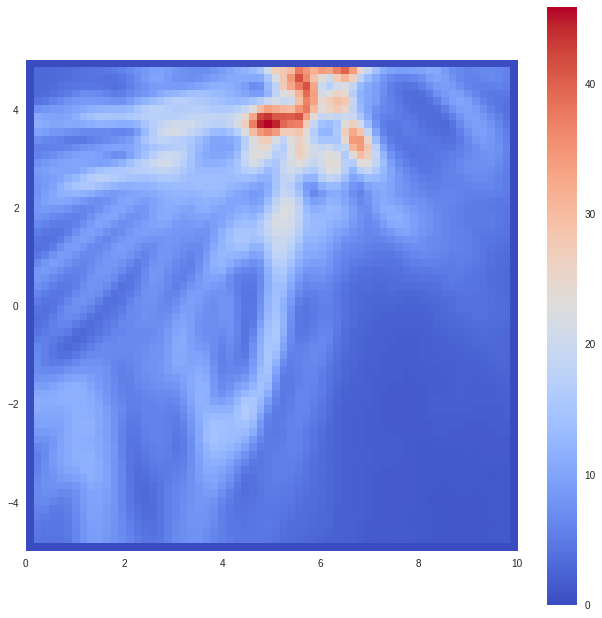

In [43]:
from matplotlib import cm
plt.figure(figsize=(11,11))
plt.imshow(np.sqrt(dets), cmap=cm.coolwarm, extent=[0, 10, -5, 5])
ax = plt.gca()
ax.grid(False)
plt.colorbar()

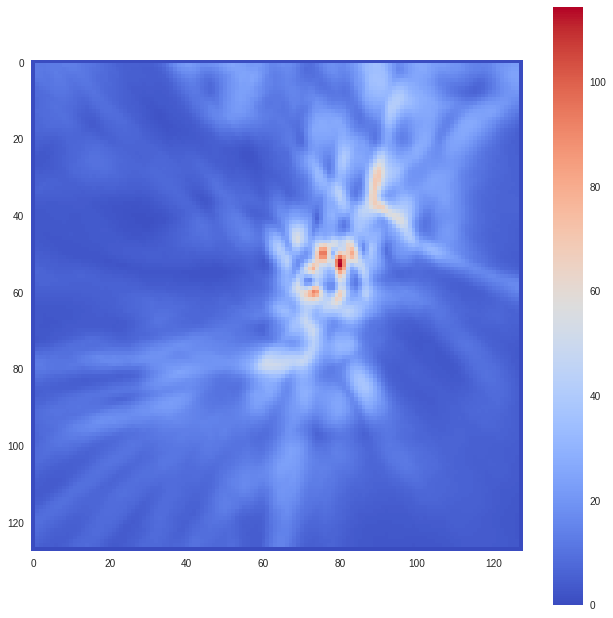

In [339]:
from matplotlib import cm
plt.figure(figsize=(11,11))
plt.imshow(np.sqrt(dets), cmap=cm.coolwarm)
ax = plt.gca()
ax.grid(False)
plt.colorbar()

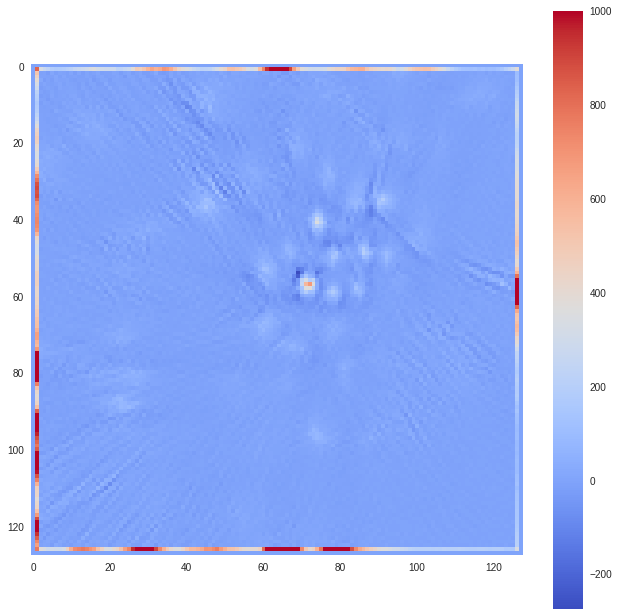

In [284]:
plt.figure(figsize=(11,11))
plt.imshow(Ricci_scalar, cmap=cm.coolwarm, vmax=1000)
ax = plt.gca()
ax.grid(False)
plt.colorbar()

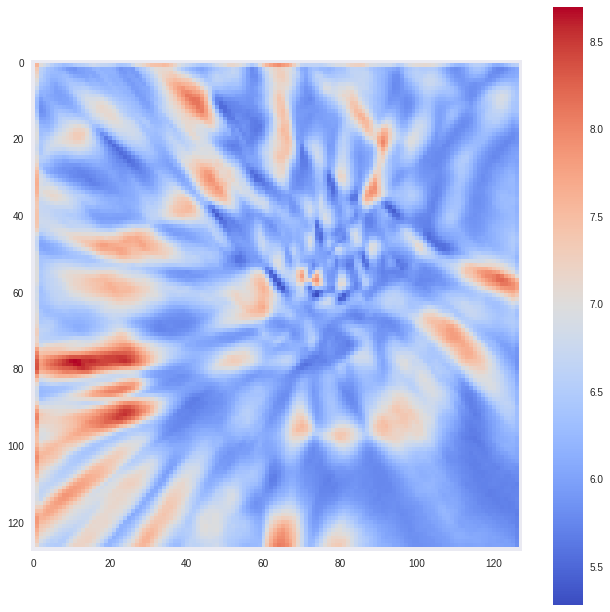

In [177]:
plt.figure(figsize=(11,11))
plt.imshow(np.log(Ricci_scalar), cmap=cm.coolwarm)
ax = plt.gca()
ax.grid(False)
plt.colorbar()

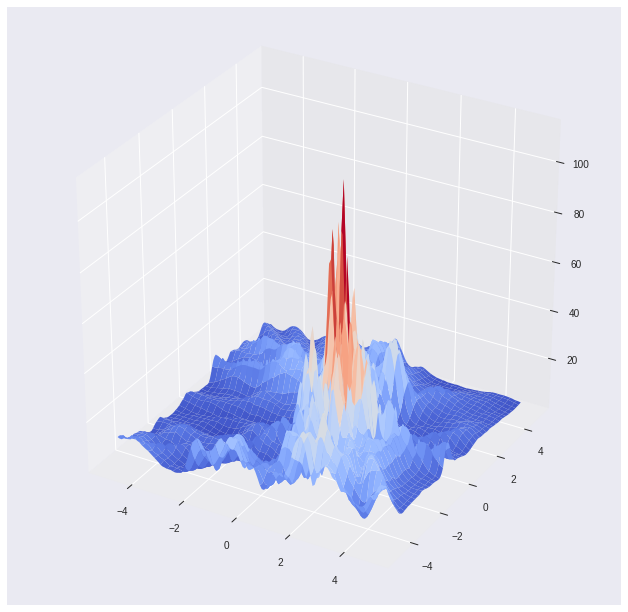

In [147]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(xs[1:-1], ys[1:-1])

Z = np.sqrt(dets[1:-1, 1:-1])
ax.plot_surface(X=X, Y=Y, Z=Z, cmap=cm.coolwarm)

In [422]:
# test on sphere:

maxx = 32*4
maxy = 32*4
xs, hx = np.linspace(0, np.pi/12, maxx, retstep=True) # theta
ys, hy = np.linspace(0, np.pi/12, maxy, retstep=True) # phi
r=0.15
xs = cheb_pts(maxx-1, r)
ys = cheb_pts(maxy-1, r)
pts = []
for x in xs:
    for y in ys:
        pts.append([x, y])
maxx*maxy

16384

In [423]:
#compute immersion of sphere in R3
immerpts = np.zeros((maxx*maxy, 3))
for ind, pt in enumerate(pts):
    immerpts[ind, :] = 10*np.array([np.sin(pt[0])*np.cos(pt[1]), np.sin(pt[0])*np.sin(pt[1]), np.cos(pt[0])])
    #flat plane:
    #immerpts[ind, :] = [pt[0], pt[1], 4]
    
#(Smats, Sinvmats, Sdmet, Sdmet2, Sdets, SRiemann, SRicci, SRicci_scalar) = diffgeo(immerpts, maxx, maxy, hx, hy)

spheremetric = compute_metric(immerpts, maxx, maxy, N=3)
sphereRiem, sphereRic, sphereSca = compute_curvature(spheremetric,r=r)

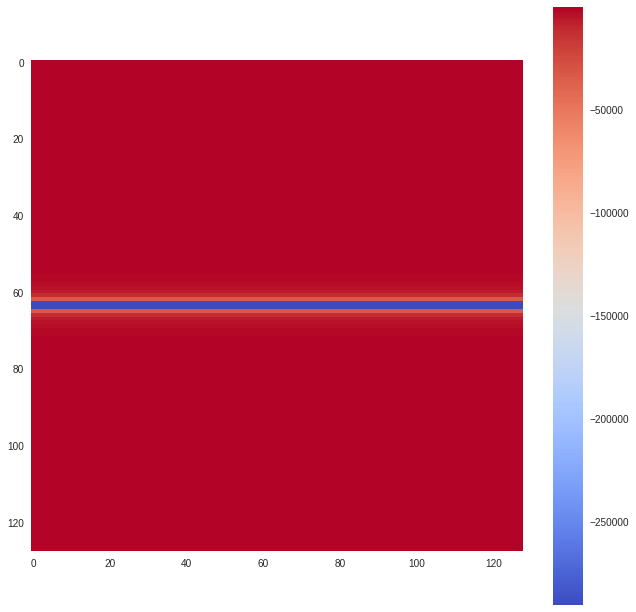

In [424]:
plt.figure(figsize=(11,11))
plt.imshow(sphereSca, cmap=cm.coolwarm)
ax = plt.gca()
ax.grid(False)
plt.colorbar()

In [425]:
sphereSca[20, 40]

-56.679863076093014

Chebyshev methods

In [ ]:
# make grid:
pts = []
maxx = 32*4
maxy = 32*4
xs, hx = np.linspace(-5, 5, maxx, retstep=True)
ys, hy = np.linspace(-5, 5, maxy, retstep=True)

r = 20
xs = cheb_pts(maxx-1, r)
ys = cheb_pts(maxy-1, r)
for x in xs:
    for y in ys:
        pts.append([x, y])
        
PTS = np.empty((0, 4096))
import tqdm
for batchnum in tqdm.tqdm(range(int(maxx*maxy / 32))):
    batchpts = pts[batchnum*32:batchnum*32+32]
    batchPTS = model.decode(batchpts)

    PTS = np.vstack((PTS, batchPTS))
    
 

In [398]:
   
def cheb_pts(N, r):
    xj = r*np.cos(np.pi*(np.arange(N+1)/(N)))
    return xj

def cheb_mat(N, r):
    x = cheb_pts(N, r)
    c = np.hstack([2, np.ones(N-1), 2])*(-1)**np.arange(0, N+1)
    X = np.tile(x, (N+1, 1))
    dX = X.T - X
    D = (c[:,np.newaxis]*(1.0/c)[np.newaxis, :])/(dX+np.identity(N+1))
    D = D - np.diag(D.sum(axis=1))
    return D, x


def compute_metric(PTS, maxx, maxy, r=1, N=4096):
    
    TV = np.zeros((maxx, maxy, 2, N))
    
    PTS = np.reshape(PTS, (maxx, maxy, N))
    Dx, _ = cheb_mat(maxx-1, r)
    DX = np.einsum('ax,xyi->ayi', Dx, PTS)
    DY = np.einsum('ay,xyi->xai', Dx, PTS)
    TV[:, :, 0, :] = DX
    TV[:, :, 1, :] = DY
    metric = np.einsum('abin,abjn->abij', TV, TV)
    return metric

def compute_determinants(metric):
    
    maxx, maxy, _, _ = np.shape(metric)
    dets = np.zeros((maxx, maxy))
    for x in range(maxx):
        for y in range(maxy):
            dets[x, y] = np.linalg.det(metric[x, y, :, :])
    return dets

def compute_curvature(metric, r=1):
    
    # compute inverse metric:
    maxx, maxy, _, _ = np.shape(metric)
    Dx, _ = cheb_mat(maxx-1, r)
    invmetric = np.zeros_like(metric)
    for x in range(maxx):
        for y in range(maxy):
            invmetric[x, y, :, :] = np.linalg.inv(metric[x, y, :, :])
    
    
    dmet=np.zeros((maxx, maxy, 2, 2, 2))
    dmet2 = np.zeros((maxx, maxy, 2,2,2,2))
    
    dmet[:, :, 0, :, :] = np.einsum('ax,xyij->ayij', Dx, metric)
    dmet[:, :, 1, :, :] = np.einsum('ay,xyij->xaij', Dx, metric)
    dmet2[:, :, 0, 0, :, :] = np.einsum('ax,xyij->ayij', Dx, dmet[:, :, 0, :, :])
    dmet2[:, :, 0, 1, :, :] = np.einsum('ax,xyij->ayij', Dx, dmet[:, :, 1, :, :])
    dmet2[:, :, 1, 0, :, :] = np.einsum('ay,xyij->xaij', Dx, dmet[:, :, 0, :, :])
    dmet2[:, :, 1, 1, :, :] = np.einsum('ay,xyij->xaij', Dx, dmet[:, :, 1, :, :])
    
    christoffel = (1/2)*(np.einsum('abjki->abkij', dmet) + np.einsum('abikj->abkij', dmet) - np.einsum('abkij->abkij', dmet))
    Christoffel = np.zeros_like(christoffel)
    Christoffel = np.einsum('abmk,abkij->abmij', invmetric, christoffel)        
    R1 = np.einsum('abklim->abiklm', dmet2) + np.einsum('abimkl->abiklm', dmet2) - np.einsum('abkmil->abiklm', dmet2) - np.einsum('abilkm->abiklm', dmet2)
    R2a = np.einsum('abnkl,abpim->abnklpim', Christoffel, Christoffel) - np.einsum('abnkm,abpil->abnkmpil', Christoffel, Christoffel)
    R2 = np.einsum('abnp,abnklpim->abiklm', metric, R2a)
    Riemann = (1/2)*R1 + R2
    Ricci = np.einsum('ablm,abiljm->abij', invmetric, Riemann)
    Ricci_scalar = np.einsum('abii->ab', Ricci)
    return (Riemann, Ricci, Ricci_scalar)

test = compute_metric(PTS, maxx, maxy, r=r)
dets = compute_determinants(test)
(tRiemann, tRicci, tScalar) = compute_curvature(test, r=r)

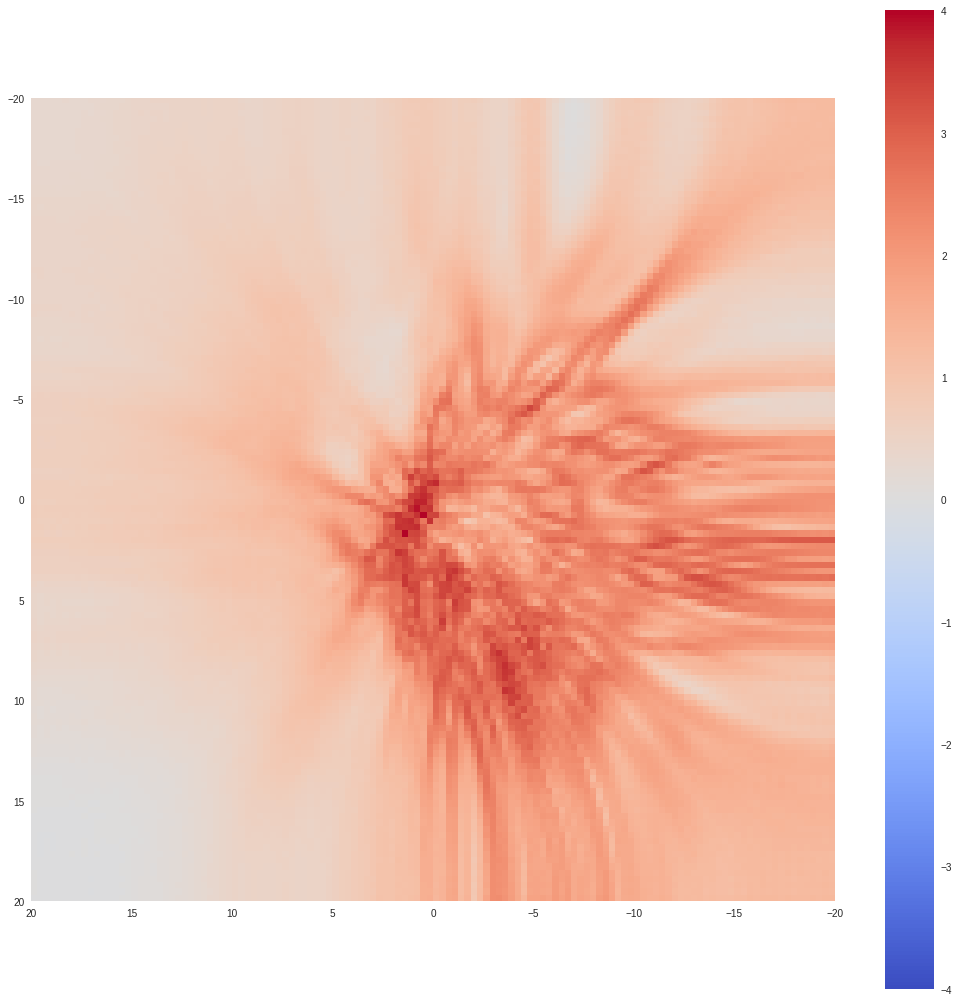

In [390]:
from matplotlib import cm
plt.figure(figsize=(18,18))
plt.imshow(np.log(np.sqrt(dets)), cmap=cm.coolwarm, extent=(np.max(xs), np.min(xs), np.max(ys), np.min(ys)), vmin=-4, vmax=4)
ax = plt.gca()
ax.grid(False)
plt.colorbar()

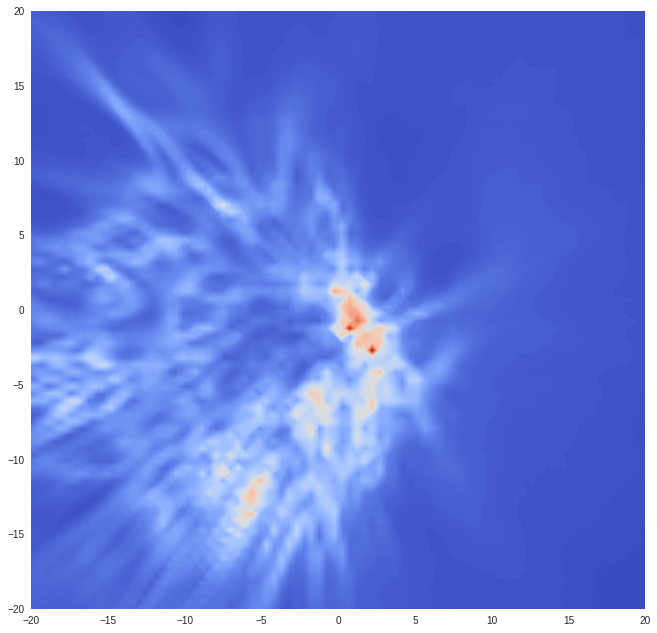

In [373]:
Xs, Ys = np.meshgrid(xs, ys)
plt.figure(figsize=(11,11))
plt.contourf(Xs, Ys, np.sqrt(dets), 200, cmap=cm.coolwarm)

(-15, 15)

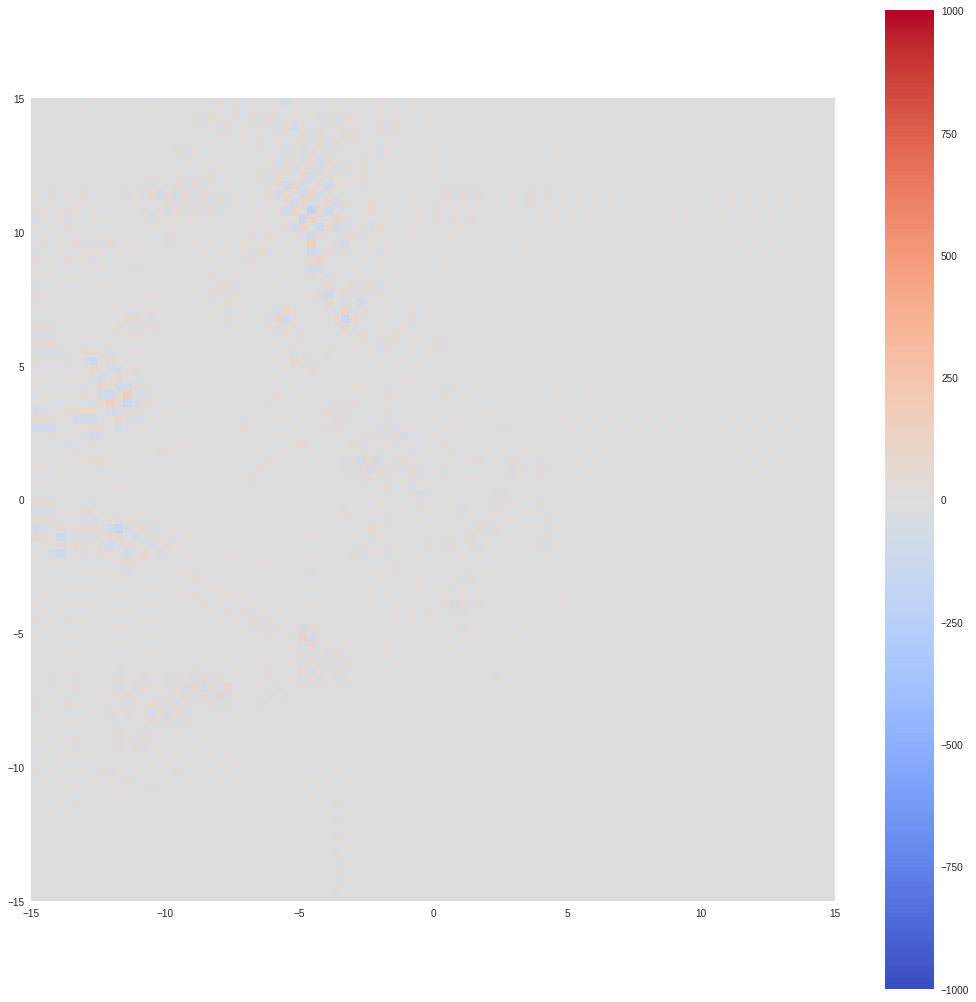

In [402]:
plt.figure(figsize=(18,18))
plt.imshow(tScalar, cmap=cm.coolwarm, extent=(np.max(xs), np.min(xs), np.max(ys), np.min(ys)), vmin=-1000, vmax=1000)
ax = plt.gca()
ax.grid(False)
plt.colorbar()
plt.xlim([-15, 15])
plt.ylim([-15, 15])

(-20, 20)

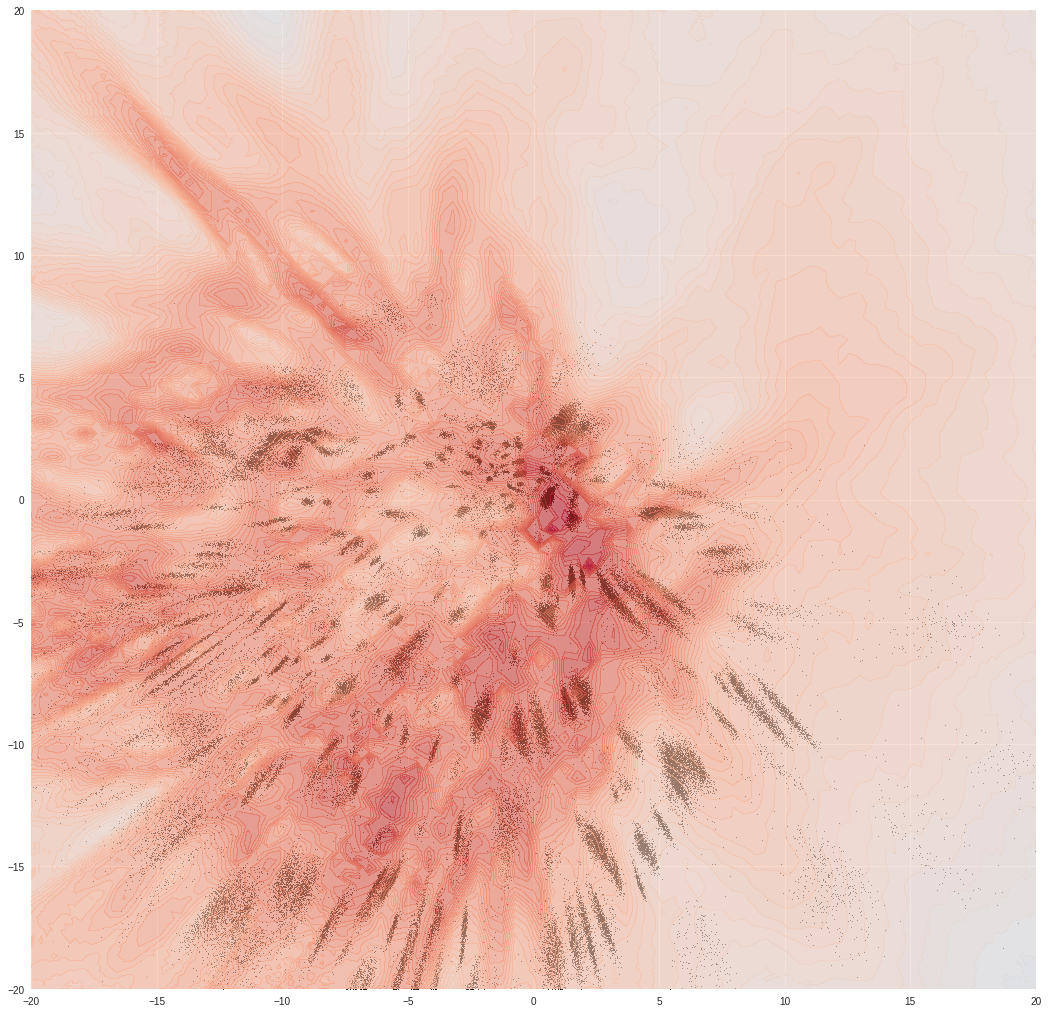

In [395]:
recon_z = np.load('all_points.npy')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,18))
ax.scatter(recon_z[:, 0], recon_z[:, 1], linewidth=0, color='k', s=1)
ax.contourf(Xs, Ys, np.log(np.sqrt(dets)), 50, cmap=cm.coolwarm, alpha=0.62, vmin=-4, vmax=4)

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])

In [403]:
np.save('orig_det.npy', dets)
np.save('metric.npy', test)

# Geodesics

In [20]:
def path_energy(path, dt):
    '''
    J: jacobian
    path: Npts x 2
    '''
    npts, _ = np.shape(path)
    #map path through decoder:
    PTS = np.empty((0, 4096))
    for batchnum in (range(int(npts / 32))):
        batchpts = pts[batchnum*32:batchnum*32+32]
        batchPTS = model.decode(batchpts)
        PTS = np.vstack((PTS, batchPTS))
        
    diff = PTS[1:, :] - PTS[0:-1, :]
    sq = np.einsum('ik,ik', diff, diff) / (2*dt)
    return sq

def runmodel(pts):
    npts, _ = np.shape(pts)
    #map path through decoder:
    PTS = np.empty((0, 4096))
    for batchnum in (range(int(npts / 32))):
        batchpts = pts[batchnum*32:batchnum*32+32]
        batchPTS = model.decode(batchpts)
        PTS = np.vstack((PTS, batchPTS))
    return PTS

def path_gradient(path, dx, dt):
    ''' 
    compute the energy gradient at the points on the path
    '''
    npts = np.shape(path)[0]
    pts = np.zeros((5*npts, 2))
    jac = np.zeros((npts, 4096, 2))
    for ind, point in enumerate(path):
        pts[ind*5:(ind*5+5), :] = [[point[0]+dx, point[1]],
                                   [point[0]-dx, point[1]],
                                   [point[0], point[1]+dx],
                                   [point[0], point[1]-dx],
                                   [point[0], point[1]]]
          
    vals = runmodel(pts)
    for ind, point in enumerate(path):
        jac[ind, :, 0] = (vals[5*ind, :] - vals[5*ind+1, :])/(2*dx)
        jac[ind, :, 1] = (vals[5*ind+2, :] - vals[5*ind+3, :])/(2*dx)
        
    
    # path vecs
    G = vals[4::5, :]
    g = G[2:, :] + G[0:-2, :] - 2*G[1:-1, :]
    grad = -1.0*np.einsum('ijl,ij->il', jac[1:-1, :, :], g)/dt
    diff = vals[1:, :] - vals[0:-1]
    E = np.einsum('ik,ik', diff, diff) / dt
    
    return (grad, E)
    
def minimize_path(path, nsteps, alpha, dt):
    for step in range(nsteps):
        (grad, E) = path_gradient(path, 0.001, 1)
        if not np.mod(step, 10):
            print('Step: ', step)
            print('Energy: ', E)
        path[1:-1, :] -= alpha*grad
    return path

In [4]:
path = np.random.randn(32, 2)
pt0 = np.array([0.01, 2.0])
pt1 = np.array([2, -4.5])
ts, dt = np.linspace(0, 1, 64, retstep=True)
path = np.array([pt0+a*(pt1-pt0) for a in ts])
print(path.shape)
init_path = np.copy(path)

(64, 2)


In [21]:
#path_energy(path, 0.1)

#path_gradient(pts, 0.1, 0.1)
minimize_path(path, 1000, 0.005, dt)

Step:  0
Energy:  10.174785992
Step:  10
Energy:  10.1715088033
Step:  20
Energy:  10.1681895243
Step:  30
Energy:  10.1652428177
Step:  40
Energy:  10.1620954169
Step:  50
Energy:  10.1587099802
Step:  60
Energy:  10.1557401543
Step:  70
Energy:  10.1529313663
Step:  80
Energy:  10.1502501872
Step:  90
Energy:  10.1478540596
Step:  100
Energy:  10.1455801507
Step:  110
Energy:  10.1432414572
Step:  120
Energy:  10.1408575209
Step:  130
Energy:  10.1384192801
Step:  140
Energy:  10.1359559486
Step:  150
Energy:  10.1338702315
Step:  160
Energy:  10.1319238092
Step:  170
Energy:  10.1301077197
Step:  180
Energy:  10.1282957653
Step:  190
Energy:  10.1263043308
Step:  200
Energy:  10.1243707292
Step:  210
Energy:  10.1224612918
Step:  220
Energy:  10.1206817699
Step:  230
Energy:  10.1188697232
Step:  240
Energy:  10.1171556751
Step:  250
Energy:  10.1155159798
Step:  260
Energy:  10.1135189971
Step:  270
Energy:  10.1103038953
Step:  280
Energy:  10.1069658891
Step:  290
Energy:  10.103

array([[ 0.01      ,  2.        ],
       [ 0.02947899,  1.85899626],
       [ 0.05912075,  1.73571489],
       [ 0.07568952,  1.61834101],
       [ 0.07637485,  1.50734566],
       [ 0.07048198,  1.39667651],
       [ 0.06276946,  1.27385419],
       [ 0.06933087,  1.15929472],
       [ 0.07933999,  1.03782669],
       [ 0.08838015,  0.93107649],
       [ 0.09826152,  0.82138785],
       [ 0.12014917,  0.72724295],
       [ 0.15454552,  0.65988033],
       [ 0.19197063,  0.6122681 ],
       [ 0.22849316,  0.57253798],
       [ 0.25787946,  0.5312577 ],
       [ 0.28162116,  0.48467126],
       [ 0.30080111,  0.42803889],
       [ 0.32011344,  0.3640775 ],
       [ 0.34296618,  0.3014151 ],
       [ 0.37238205,  0.23609351],
       [ 0.4206974 ,  0.16689008],
       [ 0.48785028,  0.08390334],
       [ 0.57851405, -0.02925524],
       [ 0.69434189, -0.20777456],
       [ 0.7537459 , -0.37155503],
       [ 0.79009724, -0.52075797],
       [ 0.82300941, -0.67108836],
       [ 0.85452667,

In [22]:
np.save('geodesic_0-2_2--4.5-longtraining3.npy', path)

[[ 0.          0.        ]
 [-0.01210831 -0.03782913]
 [-0.01405386 -0.0579359 ]
 [-0.02907238 -0.07213518]
 [-0.05997436 -0.07995592]
 [-0.09745453 -0.08745048]
 [-0.13675435 -0.10709819]
 [-0.16178024 -0.11848306]
 [-0.18335842 -0.13677648]
 [-0.20590556 -0.14035208]
 [-0.22761149 -0.14686612]
 [-0.23731115 -0.13783641]
 [-0.2345021  -0.10202443]
 [-0.22866429 -0.04646206]
 [-0.22372906  0.01698243]
 [-0.22593007  0.07887674]
 [-0.23377567  0.13546492]
 [-0.24618302  0.18200715]
 [-0.25845799  0.22122036]
 [-0.26719255  0.26173256]
 [-0.26936399  0.29958558]
 [-0.25263593  0.33355674]
 [-0.21707035  0.35374461]
 [-0.15799388  0.34376064]
 [-0.07375334  0.26841592]
 [-0.04593664  0.20781005]
 [-0.0411726   0.16178172]
 [-0.03984773  0.11462592]
 [-0.03991778  0.07562752]
 [-0.04083062  0.04580379]
 [-0.04218215  0.02096563]
 [-0.04311254  0.00077721]
 [-0.04314883 -0.01121338]
 [-0.04561021 -0.01170239]
 [-0.0458648  -0.00688247]
 [-0.04560873  0.00319643]
 [-0.04356744  0.01315995]
 

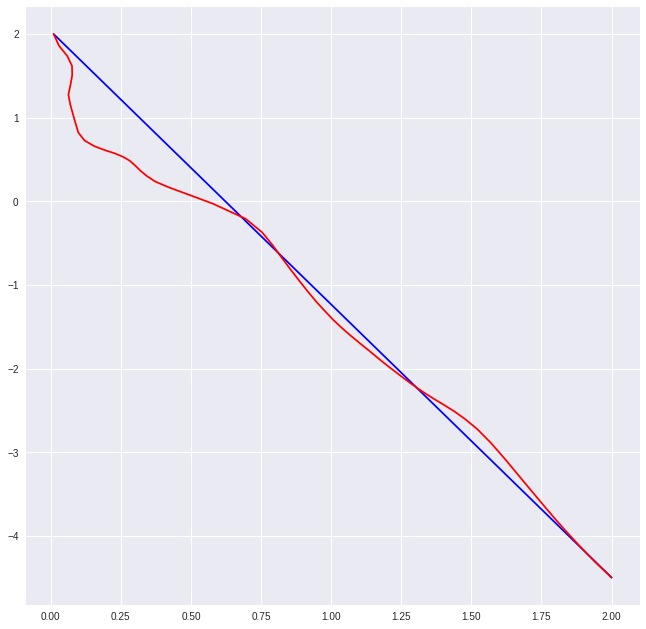

In [23]:
print(path - init_path)
plt.figure(figsize=(11,11))
plt.plot(init_path[:, 0], init_path[:, 1], 'b')
plt.plot(path[:, 0], path[:, 1], 'r')

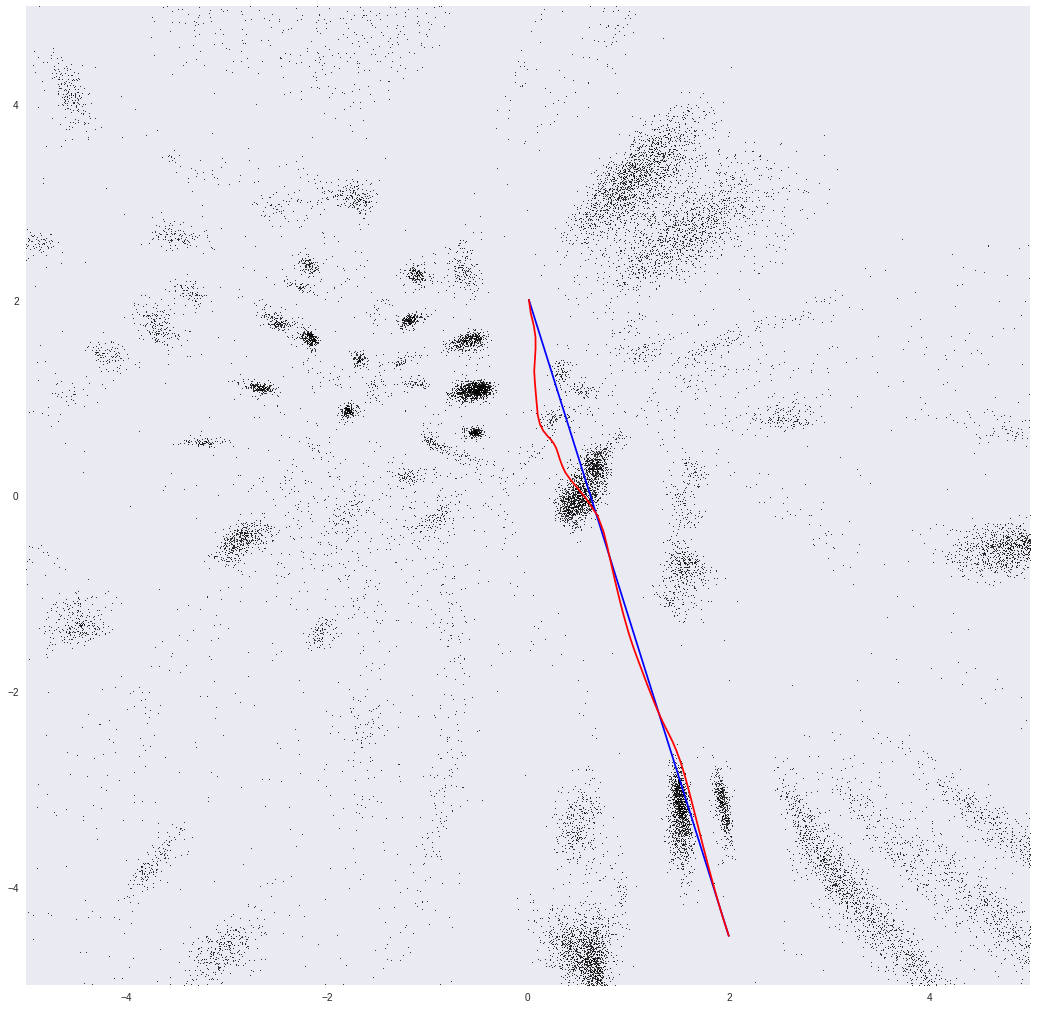

In [24]:
from matplotlib import cm
recon_z = np.load('all_points.npy')
#dets = np.load('orig_det.npy')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,18))
ax.scatter(recon_z[:, 0], recon_z[:, 1], linewidth=0, color='k', s=1)
lir = ax.plot(init_path[:, 0], init_path[:, 1], 'b')
geodc = ax.plot(path[:, 0], path[:, 1], 'r')
#ax.imshow(dets, extent=[0, 10, -5, 5], cmap=cm.coolwarm, alpha=0.9)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.grid(False)
plt.legend([lir, geodc], ['Linear', 'Geodesic'])

In [ ]:
mats = np.zeros((maxx, maxy, 2, 2))
invmats = np.zeros((maxx, maxy, 2, 2))
dets = np.zeros((maxx, maxy))
dmet = np.zeros((maxx, maxy, 2, 2, 2))
dmet2 = np.zeros((maxx, maxy, 2, 2, 2, 2))
for x_i in range(1, maxx-1):
    for y_i in range(1, maxy-1):
        i1 = maxy*(x_i - 1)+y_i
        i2 = maxy*(x_i + 1)+y_i
        i3 = maxy*x_i + (y_i-1)
        i4 = maxy*x_i + (y_i+1)
        
        i5 = maxy*(x_i - 1) + (y_i-1) # x-1, y-1
        i6 = maxy*(x_i - 1) + (y_i+1)  # x-1, y+1
        i7 = maxy*(x_i + 1) + (y_i-1) # x+1, y-1
        i8 = maxy*(x_i + 1) + (y_i+1) # x+1, y+1
        
        i0 = maxy*x_i + y_i
        mx = PTS[i1, :]
        px = PTS[i2, :]
        my = PTS[i3, :]
        py = PTS[i4, :]
        
        # first partials
        dx = (px - mx)/(2*hx)
        dy = (py - my)/(2*hy)
        
        # second partials
        rxx = (px + mx - 2*PTS[i0, :])/(hx**2)
        ryy = (py +my - 2*PTS[i0, :])/(hy**2)
        rxy = (PTS[i8, :] - PTS[i7, :] - PTS[i6, :] + PTS[i5, :])/(4*hx*hy)
        
        # Normal vector
        d1a = np.dot(dx, dx)
        d1b = np.dot(dy, dy)
        d2a = np.dot(dx, dy)
        d2b = np.dot(dx, dy)
        
        mats[x_i, y_i, 0, 0] = np.dot(dx, dx)
        mats[x_i, y_i, 1, 1] = np.dot(dy, dy)
        mats[x_i, y_i, 0, 1] = np.dot(dx, dy)
        mats[x_i, y_i, 1, 0] = np.dot(dx, dy)
        
        invmats[x_i, y_i, :, :] = np.linalg.inv(mats[x_i, y_i, :, :])
        
for x_i in range(1, maxx-1):
    for y_i in range(1, maxy-1): 
        #first derivatives of metric
        dmet[x_i, y_i, 0, :, :] = (mats[x_i+1, y_i, :, :] - mats[x_i-1, y_i, :, :])/(2*hx)
        dmet[x_i, y_i, 1, :, :] = (mats[x_i, y_i+1, :, :] - mats[x_i, y_i-1, :, :])/(2*hy)
        
        #second derivatives of metric
        dmet2[x_i, y_i, 0, 0, :, :] = (mats[x_i+1, y_i, :, :] + mats[x_i-1, y_i, :, :] - 2*mats[x_i, y_i, :, :])/(hx**2)
        dmet2[x_i, y_i, 0, 1, :, :] = (mats[x_i+1, y_i+1, :, :] - mats[x_i+1, y_i-1, :, :] - mats[x_i-1, y_i+1, :, :] + mats[x_i-1, y_i-1, :,:])/ (4*hx*hy)
        dmet2[x_i, y_i, 1, 0, :, :] = (mats[x_i+1, y_i+1, :, :] - mats[x_i+1, y_i-1, :, :] - mats[x_i-1, y_i+1, :, :] + mats[x_i-1, y_i-1, :,:])/ (4*hx*hy)
        dmet2[x_i, y_i, 1, 1, :, :] = (mats[x_i, y_i+1, :, :] + mats[x_i, y_i-1, :, :] - 2*mats[x_i, y_i, :, :])/(hy**2)
        
        # determinant of metric
        dets[x_i, y_i] = d1a*d1b-d2a*d2b
        
#Christoffels
christoffel = (1/2)*(np.einsum('abjki->abkij', dmet) + np.einsum('abikj->abkij', dmet) - np.einsum('abkij->abkij', dmet))
Christoffel = np.zeros_like(christoffel)
# Compute raised Christoffels
#for x_i in range(1, maxx-1):
#    for y_i in range(1, maxy-1):
#        
#        # determine inverse metric
#        invmet = np.linalg.inv(mats[x_i, y_i, :, :])
#        c = np.copy(christoffel[x_i, y_i, :, :, :])
#        Christoffel[x_i, y_i, :, :, :] = np.einsum('ij,jkl->ikl', invmet, c)
        
        
Christoffel = np.einsum('abmk,abkij->abmij', invmats, christoffel)        
R1 = np.einsum('abklim->abiklm', dmet2) + np.einsum('abimkl->abiklm', dmet2) - np.einsum('abkmil->abiklm', dmet2) - np.einsum('abilkm->abiklm', dmet2)
R2a = np.einsum('abnkl,abpim->abnklpim', Christoffel, Christoffel) - np.einsum('abnkm,abpil->abnkmpil', Christoffel, Christoffel)
R2 = np.einsum('abnp,abnklpim->abiklm', mats, R2a)
Riemann = (1/2)*R1 + R2
Ricci = np.einsum('ablm,abiljm->abij', invmats, Riemann)
Ricci_scalar = np.einsum('abii->ab', Ricci)